In [1]:
from MAGBET_module import *
import matplotlib
import warnings

warnings.filterwarnings('ignore') #Suppress numpy RuntimeWarnings for divisions by zero, etc. which are handled by MAGBET already

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 20})

In /home/maximilian/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/maximilian/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/maximilian/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/maximilian/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/maximilian/.local/lib/python3.6/site-packages/m

In [2]:
#Define the edges of the redshift bins
redshift_range = np.array([0.2, 0.5, 0.75]) #NOTE: redshift_range must have a length of at least 2

#---------------------------------------------
# ANALYSIS OF SIMULATIONS
#---------------------------------------------
#Define the resolution of the healpix pixels
nside = 64

#Define the resolution of the tiles in which the pixels will be grouped
nside_tes = 4

#Define file names of the simulations
filename_nomag  = 'MICE2_BOSS_magnification.fits'
filename_mag    =  'MICE2_BOSS_magnification_with_mag.fits'

#Tag for all plots
tag = 'LOW_CMASS'

#Can set the simulations to be treated as magnitude limited or not
mag_limited    = False
mag_limit_band = None
mag_limit      = None

In [3]:
#Read unmagnified file | Dilution = False always, since we only want coords before magnification
ra, dec, kappa, gamma_1, gamma_2, z = read_MICE2_fits(filename_nomag, 
                                    dilution = False, 
                                    mag_limited = mag_limited, mag_limit_band = mag_limit_band, mag_limit = mag_limit) 

#Read magnified file
dilution = True
ramag, decmag, kappamag, gamma_1mag, gamma_2mag, zmag = read_MICE2_fits(filename_mag, dilution, mag_limited, mag_limit_band, mag_limit) 

#Different datasets will need different reading methods

In [4]:
#NOTE: IF THE SIMULATIONS USED IN THE ANALYSIS ASSUME THE MAGNIFICATION FACTOR mu = 1 + 2*kappa, USE THE FUNCTIONS BELOW:

#Finds alpha values for each tile by fitting the galaxy count difference with respect to the simulated convergence

#Get relative difference of counts and mean convergence for each pixel over all tiles and reshift bins (assuming small convergence and shear)
tessellation = True 
reldiff_list, kappa_list, unc_list = compare_mag(ra, dec, kappa, z,
                                                 ramag, decmag, kappamag, zmag,
                                                 nside, redshift_range,
                                                 dilution, tessellation, nside_tes,
                                                 mag_limited, mag_limit_band, mag_limit)


#Find alphas assuming small convergence and shear
a_list, a_unc_list, gof_list, npix_list, tiles, alpha_est_list, alpha_est_unc_list = fit_kappa_vs_diff_tiled(reldiff_list, kappa_list, unc_list,
                                                                                                             nside, nside_tes,
                                                                                                             redshift_range,
                                                                                                             least_squares = True,
                                                                                                             dilution = True,
                                                                                                             mag_limited = mag_limited, mag_limit_band = mag_limit_band, mag_limit = mag_limit,
                                                                                                             plots = False, tag = tag)

# Outputs show the current redshift bin and tile that is being analysed together with the number of galaxies, 
# number of pixels and the coordinates of the anomalies that are being excluded.

For 0.2 < z < 0.5, in tile 0 with 6965 galaxies in 136 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 0: []
Excluded 0 pixels with counts going from 1 to 0 in tile 0: []
For 0.2 < z < 0.5, in tile 1 with 6635 galaxies in 136 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 1: []
Excluded 0 pixels with counts going from 1 to 0 in tile 1: []
For 0.2 < z < 0.5, in tile 2 with 6241 galaxies in 136 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 2: []
Excluded 0 pixels with counts going from 1 to 0 in tile 2: []
For 0.2 < z < 0.5, in tile 3 with 6472 galaxies in 136 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 3: []
Excluded 0 pixels with counts going from 1 to 0 in tile 3: []
For 0.2 < z < 0.5, in tile 4 with 6577 galaxies in 136 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 4: []
Excluded 0 pixels with counts going from 1 to 0 in tile 4: []
For 0.2 < z < 0.5, in tile 5 with 12089 galaxies in 256 pixels
Exclude

For 0.5 < z < 0.75, in tile 16 with 13128 galaxies in 256 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 16: []
Excluded 0 pixels with counts going from 1 to 0 in tile 16: []
For 0.5 < z < 0.75, in tile 17 with 6435 galaxies in 136 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 17: []
Excluded 0 pixels with counts going from 1 to 0 in tile 17: []
For 0.5 < z < 0.75, in tile 18 with 13009 galaxies in 256 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 18: []
Excluded 0 pixels with counts going from 1 to 0 in tile 18: []
For 0.5 < z < 0.75, in tile 19 with 13631 galaxies in 256 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 19: []
Excluded 0 pixels with counts going from 1 to 0 in tile 19: []
For 0.5 < z < 0.75, in tile 20 with 13588 galaxies in 256 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 20: []
Excluded 0 pixels with counts going from 1 to 0 in tile 20: []
For 0.5 < z < 0.75, in tile 21 with 13408 gala

In [5]:
#NOTE: IF THE SIMULATIONS USED IN THE ANALYSIS ASSUME THE MAGNIFICATION FACTOR mu = det(shear tensor) = , 
#      USE THE FUNCTIONS BELOW INSTEAD OF THE ONES FROM THE PREVIOUS CELL:

#Get relative difference of counts and mean convergence for each pixel over all tiles and reshift bins
#tessellation = True 
#ratio_list, magn_list, unc_list = compare_mag_strong(ra, dec, kappa, gamma_1, gamma_2, z,                                                     
#                                                     ramag, decmag, kappamag, gamma_1mag, gamma_2mag, zmag,
#                                                     nside, redshift_range,
#                                                     dilution, tessellation, nside_tes,
#                                                     mag_limited, mag_limit_band, mag_limit)


#Find alphas
#a_list_s, a_unc_list_s, gof_list_s, npix_list_s, tiles_s, alpha_est_list_s, alpha_est_unc_list_s = fit_ratio_vs_magn_tiled(ratio_list, magn_list, unc_list,
#                                                                                                             nside, nside_tes,
#                                                                                                             redshift_range,
#                                                                                                             least_squares = True,
#                                                                                                             dilution = True,
#                                                                                                             mag_limited = mag_limited, mag_limit_band = mag_limit_band, mag_limit = mag_limit,
#                                                                                                             plots = False, tag = tag)


In [6]:
#------------------------------------
# CALIBRATION OF OBSERVATIONS
#------------------------------------

# Load simulations
sim = fits.open('MICE2_BOSS_magnification_with_mag.fits')
mag_sim = sim[1].data['sdss_i_evo_mag']
z_sim = sim[1].data['z_cgal_v']

# Load observations
obs = fits.open('crossmatch_cmasslowz_SDSS.fits')
mag_obs = obs[1].data['cmodelMag_i']
z_obs = obs[1].data['z_1']

# Define bins used for the analsys of the observed galaxy number counts
bins = 100
bin_edges = np.linspace(min([min(mag_obs), min(mag_sim)]), max([max(mag_obs), max(mag_sim)]), bins, endpoint= True)

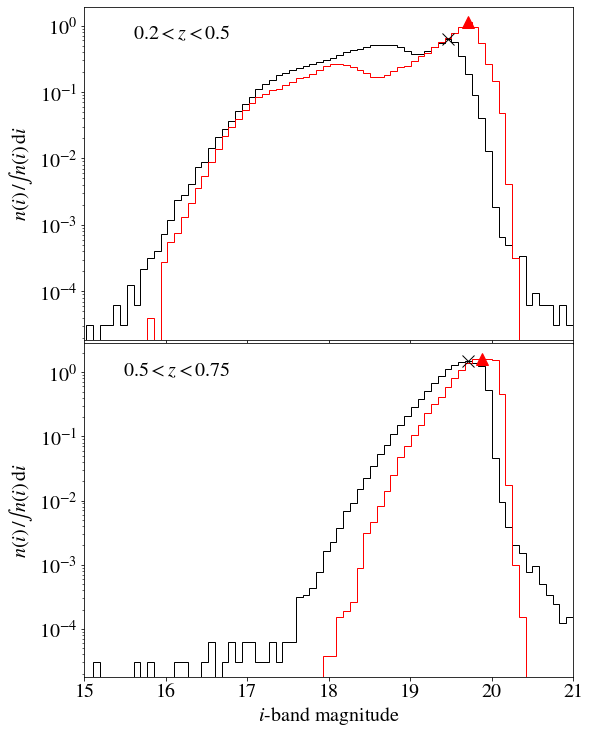

In [21]:
# Plot of the galaxy number count distributions for each redshift bin

bin_width = bin_edges[1:] - bin_edges[:-1]
bin_centers = bin_edges[:-1] + (bin_width)/2
xmin, xmax = 15, 21

fig, axs = plt.subplots(len(redshift_range)-1, sharex=True)
if not isinstance(axs, Iterable):
    axs = [axs]

for i in range(0, len(redshift_range)-1):
    #axs[i].title.set_text(r'$z \in [{0}, {1}]$'.format(round(redshift_range[i], 3), round(redshift_range[i+1], 3)))
    obs_counts, b, p = axs[i].hist(mag_obs[(redshift_range[i] <= z_obs) & (z_obs < redshift_range[i+1])], bin_edges, density = True, label = 'BOSS', histtype = 'step', color = 'k')
    sim_counts, b, p = axs[i].hist(mag_sim[(redshift_range[i] <= z_sim) & (z_sim < redshift_range[i+1])], bin_edges, density = True, label = 'MICE2', histtype = 'step', color = 'r')
    
    # Explicit recalculation and visualisation of how the code determines the galaxy count turn-off.
    peaks_obs, _ = find_peaks(obs_counts, height=0, prominence=(0.005, None))
    peaks_sim, _ = find_peaks(sim_counts, height=0, prominence=(0.005, None))
    
    axs[i].plot(bin_centers[peaks_obs][-1], obs_counts[peaks_obs][-1], "x", color = 'k', ms = 12)
    axs[i].plot(bin_centers[peaks_sim][-1], sim_counts[peaks_sim][-1], "^", color = 'r', ms = 12)
    axs[i].set_xlim([xmin, xmax])
    
    axs[i].annotate(r'${0} < z < {1}$'.format(round(redshift_range[i], 3), round(redshift_range[i+1], 3)), xy=(xmin+2, 1),  xycoords='data',
            xytext=(0.3, 0.95), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            )
    
    axs[i].set_ylabel(r'$n(i)\, / \int n(i) \, \rm{d} \mathit{i}$')
    axs[i].set_yscale('log')
    if i < len(redshift_range)-2:
        plt.setp(axs[i].get_xticklabels(), visible=False)

plt.xlabel(r'$i$-band magnitude')
plt.gcf().set_size_inches(8, 5*(len(redshift_range)-1), forward=True)
plt.tight_layout(pad=0)
plt.savefig('count_histogram_from_{0}-band_bins={1}_{2}.pdf'.format('i', bins, tag))
plt.show()

In [8]:
# Binning and counting of simulated data

counts_sim, norm_counts_sim, redshift_range_u =  get_magnitude_counts(mag_sim, z_sim, 
                                                                      bin_edges, redshift_range, 
                                                                      magnified = True,
                                                                      mag_limited = mag_limited, mag_limit = mag_limit)

In [9]:
# Calibration of the alpha value determined from observables with the simulations

#Numpy warnings can be ignored, all infinities and nans are discarded in the code
alpha_nc_list_sim, turn_off_list_sim, turn_off_unc_list_sim = get_alpha_nc(counts_sim, norm_counts_sim, bin_edges, redshift_range)

In [10]:
max_overlap_indx_list, max_overlap_range_list, max_overlap_alpha_list, max_overlap_alpha_unc_list, overlap_list, ranges_list, alpha_list, alpha_unc_list = get_calibration(alpha_est_list, alpha_est_unc_list,
                                                                                                                                                                           alpha_nc_list_sim,
                                                                                                                                                                           turn_off_list_sim, turn_off_unc_list_sim,
                                                                                                                                                                           counts_sim,
                                                                                                                                                                           bin_edges,
                                                                                                                                                                           redshift_range)

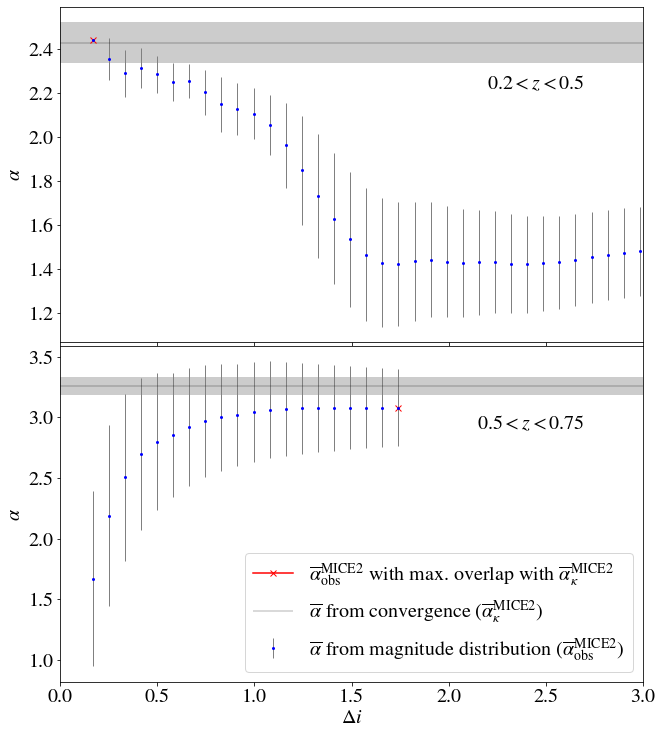

In [53]:
# Plot of the alpha values determined from mock observations when considering different magnitude ranges near the turn-off.

plt.close('all')
xmin, xmax = 0, 3

fig, axs = plt.subplots(len(redshift_range)-1, sharex=True)
if not isinstance(axs, Iterable):
    axs = [axs]

for i in range(0, len(redshift_range)-1):
    #axs[i].title.set_text(r'$z \in [{0}, {1}]$'.format(round(redshift_range[i], 3), round(redshift_range[i+1], 3)))
    axs[i].plot(ranges_list[i][~np.isnan(overlap_list[i])][max_overlap_indx_list[i]], alpha_list[i][~np.isnan(overlap_list[i])][max_overlap_indx_list[i]], ms = 6.0, marker = 'x', c = 'r', label = r'$\overline{\alpha}_{\rm{obs}}^{\rm{MICE2}}$ with max. overlap with $\overline{\alpha}^{\rm{MICE2}}_{\kappa}$')
    axs[i].errorbar(ranges_list[i][1:], alpha_list[i][1:], yerr = alpha_unc_list[i][1:], label = r'$\overline{\alpha}$ from magnitude distribution ($\overline{\alpha}_{\rm{obs}}^{\rm{MICE2}}$)', fmt = 'o', ecolor='grey', c = 'blue', ms = 2.0, lw = 1.0)
    axs[i].hlines(alpha_est_list[i], xmin, xmax, color = 'k', linewidth = 0.3, label = r'$\overline{\alpha}$ from convergence ($\overline{\alpha}^{\rm{MICE2}}_{\kappa}$)')

    upper = np.repeat(alpha_est_list[i] + alpha_est_unc_list[i], 100)
    lower = np.repeat(alpha_est_list[i] - alpha_est_unc_list[i], 100)
    axs[i].fill_between(np.linspace(xmin, xmax, 100), lower, upper, facecolor='grey', alpha = 0.4)
    axs[i].annotate(r'${0} < z < {1}$'.format(round(redshift_range[i], 3), round(redshift_range[i+1], 3)), xy=(xmax-1, 2),  xycoords='data',
            xytext=(0.9, 0.8), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            )
    axs[i].set_ylabel(r'$\alpha$')
    axs[i].set_xlim([xmin, xmax])
    if i < len(redshift_range)-2:
        plt.setp(axs[i].get_xticklabels(), visible=False)
    else:
        axs[i].legend()

plt.subplots_adjust(hspace=0)
plt.xlabel(r'$\Delta i$')
plt.gcf().set_size_inches(9, 5*(len(redshift_range)-1), forward=True)
plt.tight_layout(pad=0)
plt.savefig('alpha_varying_range_from_{0}-band_bins={1}_{2}.pdf'.format('i', bins, tag))
plt.show()

In [12]:
#------------------------------------
# ANALYSIS OF OBSERVATIONS
#------------------------------------

# Determination of alpha values from real observations based on the previous calibration from simulations

counts_obs, norm_counts_obs, redshift_range_u =  get_magnitude_counts(mag_obs, z_obs,
                                                    bin_edges, 
                                                    redshift_range, 
                                                    magnified = True, 
                                                    mag_limited = mag_limited, mag_limit = mag_limit)

In [13]:
alpha_nc_list_obs, turn_off_list_obs, turn_off_unc_list_obs = get_alpha_nc(counts_obs, norm_counts_obs, bin_edges, redshift_range)

In [14]:
alpha_obs_list, alpha_obs_unc_list = get_alpha_obs(alpha_nc_list_obs, 
                                                   turn_off_list_obs, turn_off_unc_list_obs,
                                                   counts_obs, 
                                                   overlap_list,
                                                   ranges_list, 
                                                   max_overlap_indx_list, 
                                                   bin_edges, 
                                                   redshift_range)

In [52]:
print(max_overlap_alpha_list)
print(max_overlap_alpha_unc_list)

print(alpha_obs_list)
print(alpha_obs_unc_list)

[2.44140618 3.08130732]
[0.00176005 0.31755108]
[1.92682166 2.61980651]
[0.05275913 0.2804032 ]


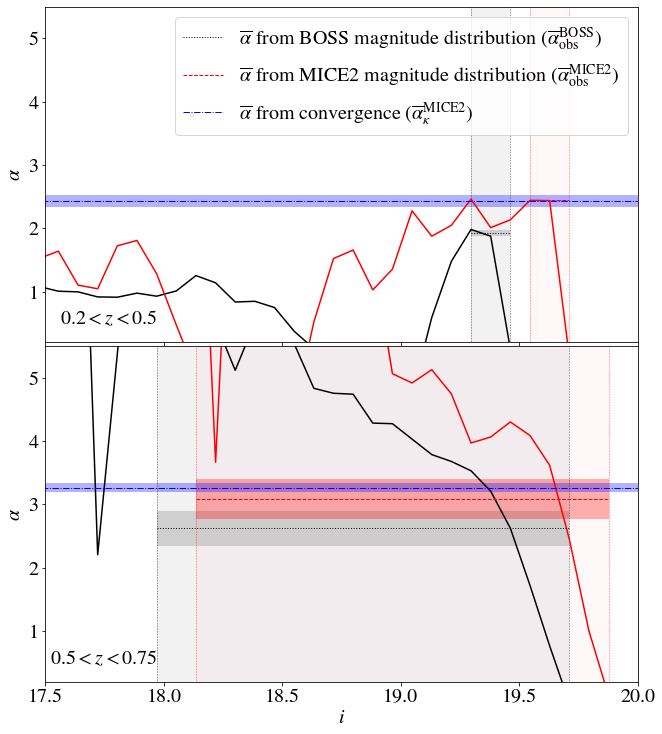

In [50]:
bin_width = bin_edges[1:] - bin_edges[:-1]
bin_centers = bin_edges[:-1] + (bin_width)/2
plt.close('all')
xmin, xmax = 17.5, 20

fig, axs = plt.subplots(len(redshift_range)-1, sharex=True)
if not isinstance(axs, Iterable):
    axs = [axs]

for i in range(0, len(redshift_range)-1):
    #axs[i].title.set_text(r'$z \in [{0}, {1}]$'.format(round(redshift_range[i], 3), round(redshift_range[i+1], 3)))
    m_range_obs = np.linspace(turn_off_list_obs[i] - max_overlap_range_list[i], turn_off_list_obs[i], 100)
    m_range_sim = np.linspace(turn_off_list_sim[i] - max_overlap_range_list[i], turn_off_list_sim[i], 100)
    
    axs[i].plot(bin_centers, alpha_nc_list_obs[i], color = 'k')
    axs[i].plot(bin_centers, alpha_nc_list_sim[i], color = 'r')
    axs[i].plot(m_range_obs, np.repeat(alpha_obs_list[i], len(m_range_obs)), label = r'$\overline{\alpha}$ from BOSS magnitude distribution ($\overline{\alpha}_{\rm{obs}}^{\rm{BOSS}}$)', color = 'k', ls = ':', lw = 1)
    axs[i].plot(m_range_sim, np.repeat(max_overlap_alpha_list[i], len(m_range_sim)), label = r'$\overline{\alpha}$ from MICE2 magnitude distribution ($\overline{\alpha}_{\rm{obs}}^{\rm{MICE2}}$)', color = 'r', ls = '--', lw = 1)

    axs[i].vlines(turn_off_list_obs[i] - max_overlap_range_list[i], -15, 15, linewidth = 0.6, color = 'k', linestyles = 'dotted')
    axs[i].vlines(turn_off_list_obs[i], -15, 15, linewidth = 0.6, color = 'k', linestyles = 'dotted')
    axs[i].vlines(turn_off_list_sim[i] - max_overlap_range_list[i], -15, 15, linewidth = 0.6, color = 'r', linestyles = 'dotted')
    axs[i].vlines(turn_off_list_sim[i], -15, 15, linewidth = 0.6, color = 'r', linestyles = 'dotted')

    axs[i].fill_between(bin_centers, -2, 15, where= (bin_centers >= turn_off_list_obs[i] - max_overlap_range_list[i]) & (bin_centers <= turn_off_list_obs[i]), facecolor='grey', alpha=0.1)
    axs[i].fill_between(bin_centers, -2, 15, where= (bin_centers >= turn_off_list_sim[i] - max_overlap_range_list[i]) & (bin_centers <= turn_off_list_sim[i]), facecolor='pink', alpha=0.1)
    
    upper = np.repeat(alpha_obs_list[i] + alpha_obs_unc_list[i], 100)
    lower = np.repeat(alpha_obs_list[i] - alpha_obs_unc_list[i], 100)
    axs[i].fill_between(m_range_obs, lower, upper, facecolor='grey', alpha = 0.3)

    upper = np.repeat(max_overlap_alpha_list[i] + max_overlap_alpha_unc_list[i], 100)
    lower = np.repeat(max_overlap_alpha_list[i] - max_overlap_alpha_unc_list[i], 100)
    axs[i].fill_between(m_range_sim, lower, upper, facecolor='red', alpha = 0.3)

    axs[i].plot(bin_centers, np.repeat(alpha_est_list[i], len(bin_centers)), label = r'$\overline{\alpha}$ from convergence ($\overline{\alpha}^{\rm{MICE2}}_{\kappa}$)', color = 'b', ls = '-.', lw = 1)
    upper = np.repeat(alpha_est_list[i] + alpha_est_unc_list[i], 100)
    lower = np.repeat(alpha_est_list[i] - alpha_est_unc_list[i], 100)
    axs[i].fill_between(np.linspace(xmin, xmax, 100), lower, upper, facecolor='b', alpha = 0.3)
    axs[i].annotate(r'${0} < z < {1}$'.format(round(redshift_range[i], 3), round(redshift_range[i+1], 3)), xy=(xmax-1, 2),  xycoords='data',
            xytext=(0.19, 0.1), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            )
    axs[i].set_ylim([0.2, 5.5])
    axs[i].set_xlim([xmin, xmax])
    axs[i].set_ylabel(r'$\alpha$')
    if i < len(redshift_range)-2:
        plt.setp(axs[i].get_xticklabels(), visible=False)
        axs[i].legend()

plt.subplots_adjust(hspace=0)
plt.xlabel(r'$i$')
plt.gcf().set_size_inches(9, 5*(len(redshift_range)-1), forward=True)
plt.tight_layout(pad=0)
plt.savefig('alpha_histogram_from_{0}-band_bins={1}_{2}.pdf'.format('i', bins, tag))
plt.show()


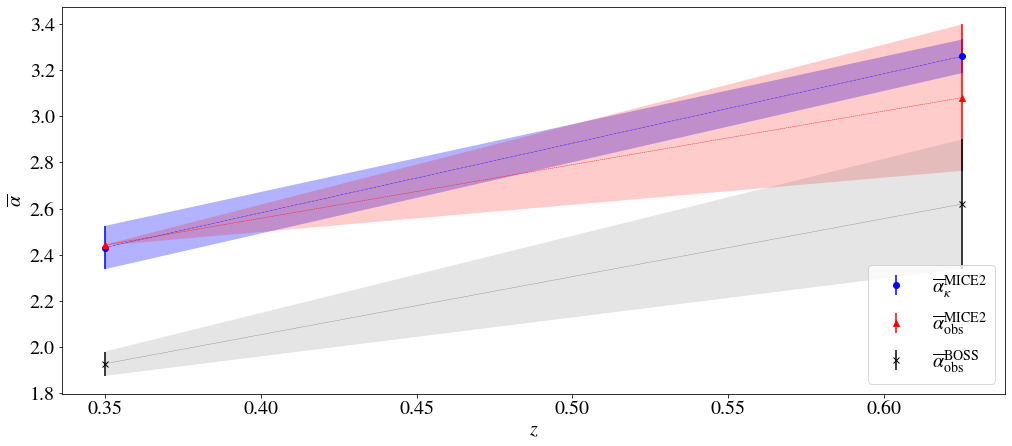

In [19]:
redshift_width = redshift_range[1:] - redshift_range[:-1]
redshift_centers = redshift_range[:-1] + (redshift_width)/2

plt.close('all')

plt.errorbar(redshift_centers, alpha_est_list, yerr = alpha_est_unc_list, label = r'$\overline{\alpha}^{\rm{MICE2}}_{\kappa}$', color =  'b', fmt = 'o')
upper = alpha_est_list + alpha_est_unc_list
lower = alpha_est_list - alpha_est_unc_list
plt.fill_between(redshift_centers, lower, upper, facecolor='b', alpha = 0.3)

plt.plot(redshift_centers, alpha_est_list, color = 'b', lw = 0.4, ls = '-.')

plt.errorbar(redshift_centers, max_overlap_alpha_list, yerr = max_overlap_alpha_unc_list, marker="^", label = r'$\overline{\alpha}^{\rm{MICE2}}_{\rm{obs}}$', color = 'r', fmt = 'o')

upper = max_overlap_alpha_list + max_overlap_alpha_unc_list
lower = max_overlap_alpha_list - max_overlap_alpha_unc_list
plt.fill_between(redshift_centers, lower, upper, facecolor='red', alpha = 0.2)

plt.plot(redshift_centers, max_overlap_alpha_list, color = 'r', lw = 0.4, ls = '--')
plt.errorbar(redshift_centers, alpha_obs_list, yerr = alpha_obs_unc_list, marker='x', label = r'$\overline{\alpha}^{\rm{BOSS}}_{\rm{obs}}$', color = 'k', fmt = 'o')

upper = alpha_obs_list + alpha_obs_unc_list
lower = alpha_obs_list - alpha_obs_unc_list
plt.fill_between(redshift_centers, lower, upper, facecolor='grey', alpha = 0.2)

plt.plot(redshift_centers, alpha_obs_list, color = 'k', lw = 0.4, ls = ':')

plt.xlabel(r'$z$')
plt.ylabel(r'$\overline{\alpha}$')
plt.gcf().set_size_inches(14, 6, forward=True)
plt.tight_layout(pad=0)
plt.legend(loc =  'lower right')
plt.savefig('alpha_range_from_{0}-band_bins={1}_{2}.pdf'.format('i', bins, tag))
plt.show()